In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
input_df = pd.read_csv('dataset_mood_smartphone-2.csv')
df = input_df.copy()


#split date and time
df['date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

grouped_df = df.groupby(['id', 'date', 'time', 'variable']).sum().reset_index()

#create dataframe of values per id per date per time
df = grouped_df.pivot_table(index=['id', 'date', 'time'], columns='variable', values='value')

In [4]:
#find the number of records
len(df), len(input_df)

(358926, 376912)

In [8]:
print(len(df.columns))
print(len(input_df['variable'].unique()))
input_df['variable'].unique()

19
19


array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [9]:
st = 'call sms appCat.builtin appCat.communication appCat.entertainment appCat.finance appCat.game appCat.office appCat.other appCat.social appCat.travel appCat.unknown appCat.utilities appCat.weather'
st = st.split(' ')
st

['call',
 'sms',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.utilities',
 'appCat.weather']

In [3]:
df.describe()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,22965.000000,91288.000000,74276.000000,27125.000000,939.000000,813.000000,5642.000000,7650.000000,19145.000000,2846.000000,939.000000,2487.000000,255.000000,5239.0,5628.000000,5628.000000,5628.000000,96578.000000,1798.0
mean,0.115958,18.538262,43.343792,37.576480,21.755251,128.391615,22.578892,25.810839,72.401906,45.730850,45.553006,18.537552,20.148714,1.0,-0.098081,0.670576,7.008706,75.335206,1.0
std,0.186946,415.989243,128.912750,262.960476,39.218361,327.145246,449.601382,112.781355,261.551846,246.109307,119.400405,60.959134,24.943431,0.0,1.049500,0.672553,1.071678,253.822497,0.0
min,0.000000,-82798.871000,0.006000,-0.011000,0.131000,1.003000,0.003000,0.014000,0.094000,0.080000,0.111000,0.246000,1.003000,1.0,-3.000000,-3.000000,1.000000,0.035000,1.0
25%,0.000000,2.020000,5.218000,1.334000,4.072000,14.148000,2.004000,7.019000,9.030000,5.086500,5.018000,3.158500,8.684000,1.0,-1.000000,0.000000,7.000000,5.322250,1.0
50%,0.021739,4.038000,16.225500,3.391000,8.026000,43.168000,3.106000,10.028000,28.466000,18.144000,17.190000,8.030000,15.117000,1.0,0.000000,1.000000,7.000000,20.044500,1.0
75%,0.158333,9.922000,45.475750,14.922000,20.155000,123.625000,8.043750,16.829250,75.372000,47.227250,44.430500,19.331000,25.349000,1.0,1.000000,1.000000,8.000000,62.540250,1.0
max,1.000000,33960.246000,9830.777000,32148.677000,355.513000,5491.793000,32708.818000,3892.038000,30000.906000,10452.615000,2239.937000,1802.649000,344.863000,1.0,2.000000,2.000000,16.000000,9867.007000,1.0


In [78]:
df.head

for column in df.columns:
    print('Column:', column)
    print(df[column].nunique())
    print()

Column: Unnamed: 0
376912

Column: id
27

Column: time
336907

Column: variable
19

Column: value
130606



In [79]:
# iterate through each pair of columns
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            # count the number of unique values for the pair of columns
            unique_count = df.groupby([col1, col2]).size().reset_index().shape[0]
            
            # print the pair of columns and the number of unique values
            print(f"{col1} and {col2}: {unique_count} unique pairs")

Unnamed: 0 and id: 376912 unique pairs
Unnamed: 0 and time: 376912 unique pairs
Unnamed: 0 and variable: 376912 unique pairs
Unnamed: 0 and value: 376710 unique pairs
id and Unnamed: 0: 376912 unique pairs
id and time: 358926 unique pairs
id and variable: 464 unique pairs
id and value: 249672 unique pairs
time and Unnamed: 0: 376912 unique pairs
time and id: 358926 unique pairs
time and variable: 342335 unique pairs
time and value: 356290 unique pairs
variable and Unnamed: 0: 376912 unique pairs
variable and id: 464 unique pairs
variable and time: 342335 unique pairs
variable and value: 172045 unique pairs
value and Unnamed: 0: 376710 unique pairs
value and id: 249672 unique pairs
value and time: 356290 unique pairs
value and variable: 172045 unique pairs


In [80]:
# pivot the dataframe
new_df = df.pivot(index=None, columns='variable', values='value')

# reset the index
new_df.reset_index(inplace=True)

# show the result
new_df

variable,index,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376907,376907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.032,NaN,NaN,NaN,NaN,NaN,NaN
376908,376908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.008,NaN,NaN,NaN,NaN,NaN,NaN
376909,376909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.026,NaN,NaN,NaN,NaN,NaN,NaN
376910,376910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.033,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# convert time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# round time to nearest hour and group by time, person_id, and variable
df['time_hour'] = df['time'].dt.round('D')
grouped_df = df.groupby(['time_hour', 'id', 'variable']).sum().reset_index()

# use pivot_table to create columns for each variable
pivoted_df = grouped_df.pivot_table(index=['time_hour', 'id'], columns='variable', values='value')

pivoted_df

variable            activity  appCat.builtin  appCat.communication  \
time_hour  id                                                        
2014-02-17 AS14.02       NaN             NaN                   NaN   
           AS14.06       NaN             NaN                   NaN   
           AS14.09       NaN             NaN                   NaN   
           AS14.14       NaN             NaN                   NaN   
           AS14.16       NaN             NaN                   NaN   
...                      ...             ...                   ...   
2014-06-05 AS14.24  1.510372         843.588              4203.992   
2014-06-06 AS14.24  3.801124        1856.035              1358.551   
2014-06-07 AS14.24  5.349713        5314.422              1254.974   
2014-06-08 AS14.24  0.602705         686.255               739.230   
2014-06-09 AS14.24  0.250000             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
time_hour  id                                                           
2014-02-17 AS14.02                   NaN             NaN          NaN   
           AS14.06                   NaN             NaN          NaN   
           AS14.09                   NaN             NaN          NaN   
           AS14.14                   NaN             NaN          NaN   
           AS14.16                   NaN             NaN          NaN   
...                                  ...             ...          ...   
2014-06-05 AS14.24                   NaN             NaN          NaN   
2014-06-06 AS14.24                   NaN             NaN          NaN   
2014-06-07 AS14.24                   NaN             NaN          NaN   
2014-06-08 AS14.24                   NaN             NaN          NaN   
2014-06-09 AS14.24                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
time_hour  id                                                                   
2014-02-17 AS14.02            NaN           NaN            NaN            NaN   
           AS14.06            NaN           NaN            NaN            NaN   
           AS14.09            NaN           NaN            NaN            NaN   
           AS14.14            NaN           NaN            NaN            NaN   
           AS14.16            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
2014-06-05 AS14.24            NaN        43.519         87.047            NaN   
2014-06-06 AS14.24            NaN        41.542        153.855        225.737   
2014-06-07 AS14.24            NaN        29.194            NaN            NaN   
2014-06-08 AS14.24            NaN        24.283        297.610            NaN   
2014-06-09 AS14.24            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
time_hour  id                                                                
2014-02-17 AS14.02             NaN               NaN             NaN   1.0   
           AS14.06             NaN               NaN             NaN   2.0   
           AS14.09             NaN               NaN             NaN   2.0   
           AS14.14             NaN               NaN             NaN   NaN   
           AS14.16             NaN               NaN             NaN   1.0   
...                            ...               ...             ...   ...   
2014-06-05 AS14.24             NaN               NaN             NaN   3.0   
2014-06-06 AS14.24             NaN             2.072             NaN  11.0   
2014-06-07 AS14.24             NaN               NaN             NaN  14.0   
2014-06-08 AS14.24             NaN               NaN             NaN   NaN   
2014-06-09 AS14.24             NaN               NaN             NaN   NaN   

variable            circumplex.arousal  circumplex.valence  mood      

KeyError: 'appCat.communication'

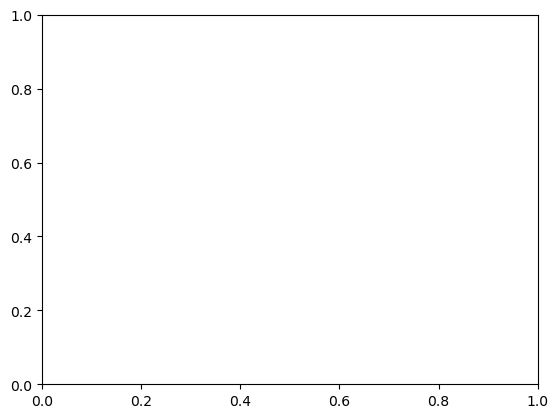

In [83]:
import matplotlib.pyplot as plt

df['time_hour'] = pd.to_datetime(df['time_hour'])

# group the data by date and plot the mood against the example for each date
groups = df.groupby(df['time_hour'].dt.date)
for date, group in groups:
    fig, ax = plt.subplots()
    ax.plot(group['appCat.communication'], group['mood'])
    ax.set_xlabel('appCat.communication')
    ax.set_ylabel('mood')
    ax.set_title('Mood vs. Example for {}'.format(date))
    plt.show()

In [85]:
# convert time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# round time to nearest hour and group by time, person_id, and variable
df['time_hour'] = df['time'].dt.round('D')
grouped_df = df.groupby(['time_hour', 'id', 'variable']).sum().reset_index()

# use pivot_table to create columns for each variable
pivoted_df = grouped_df.pivot_table(index=['time_hour', 'id'], columns='variable', values='value')

pivoted_df

variable            activity  appCat.builtin  appCat.communication  \
time_hour  id                                                        
2014-02-17 AS14.02       NaN             NaN                   NaN   
           AS14.06       NaN             NaN                   NaN   
           AS14.09       NaN             NaN                   NaN   
           AS14.14       NaN             NaN                   NaN   
           AS14.16       NaN             NaN                   NaN   
...                      ...             ...                   ...   
2014-06-05 AS14.24  1.510372         843.588              4203.992   
2014-06-06 AS14.24  3.801124        1856.035              1358.551   
2014-06-07 AS14.24  5.349713        5314.422              1254.974   
2014-06-08 AS14.24  0.602705         686.255               739.230   
2014-06-09 AS14.24  0.250000             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
time_hour  id                                                           
2014-02-17 AS14.02                   NaN             NaN          NaN   
           AS14.06                   NaN             NaN          NaN   
           AS14.09                   NaN             NaN          NaN   
           AS14.14                   NaN             NaN          NaN   
           AS14.16                   NaN             NaN          NaN   
...                                  ...             ...          ...   
2014-06-05 AS14.24                   NaN             NaN          NaN   
2014-06-06 AS14.24                   NaN             NaN          NaN   
2014-06-07 AS14.24                   NaN             NaN          NaN   
2014-06-08 AS14.24                   NaN             NaN          NaN   
2014-06-09 AS14.24                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
time_hour  id                                                                   
2014-02-17 AS14.02            NaN           NaN            NaN            NaN   
           AS14.06            NaN           NaN            NaN            NaN   
           AS14.09            NaN           NaN            NaN            NaN   
           AS14.14            NaN           NaN            NaN            NaN   
           AS14.16            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
2014-06-05 AS14.24            NaN        43.519         87.047            NaN   
2014-06-06 AS14.24            NaN        41.542        153.855        225.737   
2014-06-07 AS14.24            NaN        29.194            NaN            NaN   
2014-06-08 AS14.24            NaN        24.283        297.610            NaN   
2014-06-09 AS14.24            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
time_hour  id                                                                
2014-02-17 AS14.02             NaN               NaN             NaN   1.0   
           AS14.06             NaN               NaN             NaN   2.0   
           AS14.09             NaN               NaN             NaN   2.0   
           AS14.14             NaN               NaN             NaN   NaN   
           AS14.16             NaN               NaN             NaN   1.0   
...                            ...               ...             ...   ...   
2014-06-05 AS14.24             NaN               NaN             NaN   3.0   
2014-06-06 AS14.24             NaN             2.072             NaN  11.0   
2014-06-07 AS14.24             NaN               NaN             NaN  14.0   
2014-06-08 AS14.24             NaN               NaN             NaN   NaN   
2014-06-09 AS14.24             NaN               NaN             NaN   NaN   

variable            circumplex.arousal  circumplex.valence  mood      

In [47]:
df.info()

df.time.dtype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376912 entries, 0 to 376911
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  376912 non-null  int64  
 1   id          376912 non-null  object 
 2   time        376912 non-null  object 
 3   variable    376912 non-null  object 
 4   value       376710 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


dtype('O')

In [57]:
df[['date', 'time']] = df['time'].str.split(' ', expand=True)

# print the dataframe
df

KeyError: 'time'

In [12]:
unique = df_dummies.nunique()



activity                2
appCat.builtin          2
appCat.communication    2
appCat.entertainment    2
appCat.finance          2
appCat.game             2
appCat.office           2
appCat.other            2
appCat.social           2
appCat.travel           2
appCat.unknown          2
appCat.utilities        2
appCat.weather          2
call                    2
circumplex.arousal      2
circumplex.valence      2
mood                    2
screen                  2
sms                     2
dtype: int64


In [22]:
distinct_values = df['variable'].unique()

# print the distinct values
print(distinct_values)

mood = df.loc[df['variable'] == 'mood']
mood   

['mood' 'circumplex.arousal' 'circumplex.valence' 'activity' 'screen'
 'call' 'sms' 'appCat.builtin' 'appCat.communication'
 'appCat.entertainment' 'appCat.finance' 'appCat.game' 'appCat.office'
 'appCat.other' 'appCat.social' 'appCat.travel' 'appCat.unknown'
 'appCat.utilities' 'appCat.weather']


,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0
...,...,...,...,...,...
5636,5637,AS14.33,2014-05-30 09:00:00.000,mood,8.0
5637,5638,AS14.33,2014-05-30 13:00:00.000,mood,6.0
5638,5639,AS14.33,2014-05-30 19:00:00.000,mood,8.0
5639,5640,AS14.33,2014-05-30 20:00:00.000,mood,6.0


In [42]:
# loop through all the distinct values of the 'column_name' column
for value in df['variable'].unique():
    
    # get the minimum and maximum value of the current value in the 'column_name' column
    min_value = df[df['variable'] == value].min()
    max_value = df[df['variable'] == value].max()
    
    # print the minimum and maximum value of the current value in the 'column_name' column
    print(f"Distinct value: {value}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")
    print("\n")


Distinct value: mood
Minimum value: Unnamed: 0                          1
id                            AS14.01
time          2014-02-26 13:00:00.000
variable                         mood
value                             1.0
dtype: object
Maximum value: Unnamed: 0                       5641
id                            AS14.33
time          2014-06-08 09:00:00.000
variable                         mood
value                            10.0
dtype: object


Distinct value: circumplex.arousal
Minimum value: Unnamed: 0                       5642
id                            AS14.01
time          2014-02-26 13:00:00.000
variable           circumplex.arousal
value                            -2.0
dtype: object
Maximum value: Unnamed: 0                      11284
id                            AS14.33
time          2014-06-08 09:00:00.000
variable           circumplex.arousal
value                             2.0
dtype: object


Distinct value: circumplex.valence
Minimum value: Unnamed: 0    